# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/tunguz/200000-jeopardy-questions

Import the necessary libraries and create your dataframe(s).

In [7]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Create dataframe
jeopardy_df = pd.read_csv("JEOPARDY_CSV.csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [8]:
# Find nulls
jeopardy_df.isna().sum()

# Missing data in Answer column is extremely minimal. I can pull these rows to see if I can find the answer online myself.
answer_null = jeopardy_df.loc[jeopardy_df['Answer'].isnull()]
answer_null
# All of the answers are actually 'Null' and python thought that meant they were missing. Too Funny!
jeopardy_df['Answer'].fillna('Null', inplace = True)
# Confirming that Answer no longer has any true null values.
answer_null.sum()

KeyError: 'Answer'

In [ ]:
# Missing data in Value column is very large. I could consider interpolate?
value_null = jeopardy_df.loc[jeopardy_df['Value'].isnull()]
value_null
# 3,634 nulls

# Exploring the fact that the rows returned with nulls in the Value column may correspond simply to rounds of Finaly Jeopardy. This would make a lot more sense as 
# that round does not have a predefined value. The value is set/wagered by the player themselves.
final_jeopardy = jeopardy_df[jeopardy_df['Round']=='Final Jeopardy!']
final_jeopardy
# 3,631 rows returned 

,Show Number,Air Date,Round,Category,Value,Question,Answer
55,4680,2004-12-31,Final Jeopardy!,THE SOLAR SYSTEM,NaN,Objects that pass closer to the sun than Mercu...,Icarus
116,5957,2010-07-06,Final Jeopardy!,HISTORIC WOMEN,NaN,She was born in Virginia around 1596 & died in...,Pocahontas
174,3751,2000-12-18,Final Jeopardy!,SPORTS LEGENDS,NaN,If Joe DiMaggio's hitting streak had gone one ...,H.J. Heinz (Heinz 57 Varieties)
235,3673,2000-07-19,Final Jeopardy!,THE MAP OF EUROPE,NaN,"Bordering Italy, Austria, Hungary & Croatia, i...",Slovenia
296,4931,2006-02-06,Final Jeopardy!,FAMOUS SHIPS,NaN,"On December 27, 1831 it departed Plymouth, Eng...",the HMS Beagle
...,...,...,...,...,...,...,...
216686,3940,2001-10-19,Final Jeopardy!,MAJOR LEAGUE BASEBALL TEAM NAMES,NaN,This team received its name after an 1890 inci...,Pittsburgh Pirates
216746,6044,2010-12-16,Final Jeopardy!,SKYSCRAPERS,NaN,After a construction boom fueled by oil & gas ...,Moscow
216807,5070,2006-09-29,Final Jeopardy!,NATIONAL CAPITALS,NaN,"This city's website calls it ""the last divided...",Nicosia
216868,5195,2007-03-23,Final Jeopardy!,BESTSELLING AUTHORS,NaN,He had the year's bestselling novel a record 7...,John Grisham


In [ ]:
# Find null values in Value column that don't occur in Final Jeopardy!
null_values_other = jeopardy_df[(jeopardy_df['Value'].isnull()) & (jeopardy_df['Round']!='Final Jeopardy!')]
null_values_other
# Other nulls are present in Round of Tiebreakers which also do not have a fixed value. These 3 added to the 3,631 rows of Final Jeopardy! is the total amount of nulls 
# found in the Value column.

,Show Number,Air Date,Round,Category,Value,Question,Answer
12305,5332,2007-11-13,Tiebreaker,CHILD'S PLAY,NaN,A Longfellow poem & a Lillian Hellman play abo...,The Children's Hour
184710,2941,1997-05-19,Tiebreaker,THE AMERICAN REVOLUTION,NaN,"On Nov. 15, 1777 Congress adopted this constit...",the Articles of Confederation
198973,4150,2002-09-20,Tiebreaker,LITERARY CHARACTERS,NaN,"Hogwarts headmaster, he's considered by many t...",Professor Dumbledore


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: >

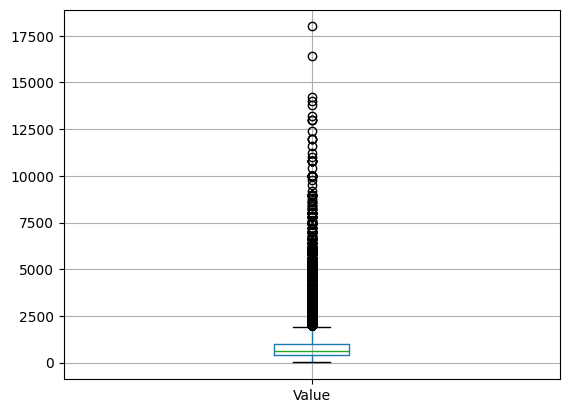

In [ ]:
# As I determined in the EDA phase, the Value that are fixed in Jeopardy are multiples of 100, and in this dataset there were values that did not correspond to the standard. 
# Upon further exploration, the Values that did not correspond to the fixed values were those in which contestants wagered/bet their own amounts, likely due to 
# Daily Doubles as Final Jeopardy! and Tiebreakers had NaN values.

jeopardy_df.describe()
# The describe of Show Number isn't relevant, but looking at the Value, I can see the min and max are 5 and 18000, respectively. The Value of 5 and 18000 are not a fixed
# fixed value on Jeopardy. From describe, Value column 
Q1 = 400.0 
Q3 = 1000.0
iqr_value = Q3 - Q1
iqr_value #600.0
# Find lower range
lower_value = Q1 - (1.5*600.0)
lower_value # -500.0

# Find upper range
upper_value = Q3 + (1.5*600.0)
upper_value #1900
# With the IQR method, any values that fall outside of -500.0 to 1900.0 are considered outliers.
jeopardy_df.boxplot(column='Value')
# This isn't very helpful. With my previous knowledge of fixed clue values, I can determine where Values are not those fixed amounts.

In [ ]:
# Find all years in Air Date column to determine if value amounts in the dataset changed overtime.
years = jeopardy_df['Air Date'].str[0:4]
unique_years = years.unique()
unique_years

sort_years = sorted(unique_years)
sort_years
# Years: 1984-2012

# We see that the earliest year in the dataset is 1984. Per Wikipedia (https://en.wikipedia.org/wiki/Jeopardy!), the values in 1984 had clue values of $100, $200, $300, $400,
# $500 for Jeopardy! and values of $200, $400, $600, $800, and $1000 for Double Jeopardy!. # This changed beginning November 26th, 2001, with Jeopardy values of $200, $400, 
# $600, $800, and $1000 and Double Jeopardy! values of $400, $800, $1200, $1600, and $2000. 
# We could then possibly consider any of the values that are not the ones I listed above to be outliers. I say possibly because their actual value isn't beneficial, but knowing
# which rows correspond to Daily Doubles can be beneficial to future contestants. Therefore, it isn't necessary to remove them. For any analysis involving values, I may need to
# perform conditional filtering. In the next code block I'll be filtering out the non-fixed values after determining the Show Numbers that correspond to the old clue values and 
# new clue values that began 11/26/2021.

In [ ]:
# Find Show ID that corresponds to the new clue Values that began Nov. 26, 2001.
new_value_showid = jeopardy_df[jeopardy_df['Air Date'] == '2001-11-26']
new_value_showid
# Show ID from 3966 and on has the clue values of $200, $400, $600, $800, and $1000 and Double Jeopardy! values of $400, $800, $1200, $1600, and $2000. 

# Find last Show ID before clue values changed because I didn't want to assume the dataset had consistent reporting from show to show. 2001-11-25 is a Sunday, not a weekday.
old_value_showid = jeopardy_df[jeopardy_df['Air Date'] == '2001-11-23']
old_value_showid
# Show ID is 3965. Those have clue values of $100, $200, $300, $400, # $500 for Jeopardy! and values of $200, $400, $600, $800, and $1000 for Double Jeopardy!

# Pull rows of data where Values are not any of the fixed listed above.
# Jeopardy! round only
old_j_value = [100.0, 200.0, 300.0, 400.0, 500.0]
wager_values_j_old = jeopardy_df[~jeopardy_df['Value'].isin(old_j_value) & (jeopardy_df['Round'] == 'Jeopardy!') & (jeopardy_df['Show Number']<= 3965)]
wager_values_j_old
# 741 values that didn't correspond to fixed values in Jeopardy! round

# We can possibly conclude that these values were a result of a Daily Double. Let's see if there's any duplicates.
duplicate_dd_j_old = wager_values_j_old[wager_values_j_old.duplicated(subset=['Show Number'], keep=False)]
duplicate_dd_j_old
# No duplicates. We know then that the values that do not correspond to the fixed values are a result of Daily Doubles. 

# Double Jeopardy! round only
old_dj_value = [200.0, 400.0, 600.0, 800.0, 1000.0]
wager_values_dj_old = jeopardy_df[~jeopardy_df['Value'].isin(old_dj_value) & (jeopardy_df['Round'] == 'Double Jeopardy!') & (jeopardy_df['Show Number']<= 3965)]
wager_values_dj_old
# 1854 values that didn't correspond to fixed values in Double Jeopardy! round

# We can possibly conclude that these values were a result of a Daily Double. Let's look for duplicates which I expect to see because there are two 
# Daily Doubles to be found in the Double Jeopardy! rounds.
duplicate_dd_dj_old = wager_values_dj_old[wager_values_dj_old.duplicated(subset=['Show Number'], keep=False)]
duplicate_dd_dj_old
# Yes duplicates (1227). We can manipulate this in the next part of the project.

,Show Number,Air Date,Round,Category,Value,Question,Answer
581,3036,1997-11-10,Double Jeopardy!,"""HIGH"" SCHOOL",2000.0,"Coastal waters beyond national jurisdiction, o...",High seas/C's
585,3036,1997-11-10,Double Jeopardy!,ART,1800.0,17th century Flemish master known for painting...,Peter Paul Rubens
706,2735,1996-06-21,Double Jeopardy!,WORLD GEOGRAPHY,1500.0,"Cabinda, an area of this former Portuguese col...",Angola
710,2735,1996-06-21,Double Jeopardy!,MEDICAL MILESTONES,2000.0,In 1982 William DeVries performed the 1st perm...,Barney Clark
929,3834,2001-04-12,Double Jeopardy!,SCIENCE & NATURE,1800.0,The flexible neck of this bird of prey allows ...,Owl
...,...,...,...,...,...,...,...
216372,3919,2001-09-20,Double Jeopardy!,"""D"" TOUR",1600.0,"About 20 miles northwest of Raleigh, this city...",Durham
216430,3644,2000-06-08,Double Jeopardy!,VIRGINIA MILITARY INSTITUTE,700.0,Among VMI's most famous graduates is this 20th...,George Marshall
216433,3644,2000-06-08,Double Jeopardy!,BRITISH AUTHORS,1200.0,"Sadly, her mother, Mary Wollstonecraft, died j...",Mary Shelley
216545,3038,1997-11-12,Double Jeopardy!,MODELS,1300.0,"The famous feature seen here belongs to this ""...",Cindy Crawford (the mole on her face)


In [ ]:
# When values changed on Show Number 3966. Show ID from 3966 and on has the clue values of $200, $400, $600, $800, and $1000 and 
# Double Jeopardy! values of $400, $800, $1200, $1600, and $2000. 

# Pull rows of data where Values are not any of the fixed listed above.
# Jeopardy! round only
new_j_value = [200.0, 400.0, 600.0, 800.0, 1000.0]
wager_values_j_new = jeopardy_df[~jeopardy_df['Value'].isin(new_j_value) & (jeopardy_df['Round'] == 'Jeopardy!') & (jeopardy_df['Show Number']>= 3966)]
wager_values_j_new
# 1106 values that didn't correspond to fixed values in Jeopardy! round
# We can possibly conclude that these values were a result of a Daily Double. Let's see if there's any duplicates.
duplicate_dd_j_new = wager_values_j_new[wager_values_j_new.duplicated(subset=['Show Number'], keep=False)]
duplicate_dd_j_new
# No duplicates. We know then that the values that do not correspond to the fixed values are a result of Daily Doubles. 

# Double Jeopardy! round only
new_dj_value = [400.0, 800.0, 1200.0, 1600.0, 2000.0]
wager_values_dj_new = jeopardy_df[~jeopardy_df['Value'].isin(new_dj_value) & (jeopardy_df['Round'] == 'Double Jeopardy!') & (jeopardy_df['Show Number']>= 3966)]
wager_values_dj_new
# 2924 values that didn't correspond to fixed values in Double Jeopardy! round

# We can possibly conclude that these values were a result of a Daily Double. Let's look for duplicates which I expect to see because there are two 
# Daily Doubles to be found in the Double Jeopardy! rounds.
duplicate_dd_dj_new = wager_values_dj_new[wager_values_dj_new.duplicated(subset=['Show Number'], keep=False)]
duplicate_dd_dj_new
# Yes duplicates. We can manipulate this in the next part of the project.

# I think the best way to handle these will be one of two ways: determine the original value of the questions and fill that in or create another column indicating whether
# the row was a Daily Double or not. I could also consider creating an additional dataframe for only Daily Doubles for more robust analyses.


,Show Number,Air Date,Round,Category,Value,Question,Answer
104,5957,2010-07-06,Double Jeopardy!,SCIENCE CLASS,5000.0,"Of the 6 noble gases on the periodic table, it...",helium
109,5957,2010-07-06,Double Jeopardy!,IN THE DICTIONARY,5000.0,This word for someone who walks comes from the...,pedestrian
277,4931,2006-02-06,Double Jeopardy!,FROM THE GREEK,1000.0,"A bowl-shaped depression, as from the impact o...",crater
281,4931,2006-02-06,Double Jeopardy!,WORDS OF THE WRITER,1500.0,"""'Do all lawyers defend n-negroes, Atticus?' ...",Harper Lee
344,5690,2009-05-08,Double Jeopardy!,WORD ORIGINS,4800.0,This compass direction may come from the Proto...,north
...,...,...,...,...,...,...,...
216505,5061,2006-09-18,Double Jeopardy!,LET'S EAT,1000.0,"For Marcel Proust the ""vicissitudes of life ha...",madeleines
216844,5195,2007-03-23,Double Jeopardy!,HAIL TO THE CHEF,2600.0,"In 1984 he published his ""Louisiana Kitchen Co...",Paul Prudhomme
216854,5195,2007-03-23,Double Jeopardy!,WOMEN WRITERS,4000.0,She wrote for the Nebraska State Journal & the...,Willa Cather
216916,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,2200.0,"Oscar Wilde called this 4-letter word ""the cur...",work


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
# Find duplicates, irrelevant, uninformative data

# Find duplicate entire rows.
duplicate_count = jeopardy_df[jeopardy_df.duplicated()].sum()
duplicate_count
# No duplicate entire rows found. 

# Check for duplicates in specific column of Question.
duplicate_question = jeopardy_df[jeopardy_df.duplicated(subset=['Question'])]
sort_duplicate_question = duplicate_question.sort_values(by='Question')
sort_duplicate_question

# While sorting the duplicates in the Question column, I find that there are multiple values in Question called [video clue]. I want to see how
# many questions have that.
video_clue_ct = jeopardy_df['Question']=='[video clue]'
video_clue_ct.value_counts()
# 14 questions labeled [video clue]. I don't think at this time it is necessary to remove these as it could be interesting to see if there 
# are any trends for the contestant to be aware of (i.e. do video clues end up in specific categories, values, rounds?)

Question
False    216916
True         14
Name: count, dtype: int64

In [ ]:
# Look at content of questions that contain symbols like 
# https://www.geeksforgeeks.org/pandas-remove-rows-with-special-characters/
symbols = r'[@#$%^&*()_+\=\[\]{}\<>/|\\`~]'
q_symbols = jeopardy_df[jeopardy_df.Question.str.contains(symbols, na=False)]
q_symbols
# Yikes! That's a lot at 60099 rows.

# Used this link to figure out how to view more of the Question column content: https://www.geeksforgeeks.org/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
pd.set_option('display.max_colwidth',3000)
q_symbols[['Show Number', 'Category', 'Question', 'Answer']].head(50)

# I want to explore what the j-archive.com in the Question column means. https://j-archive.com/
# Find all questions with j-archive in string.abs
j_archive = 'j-archive'
j_archive_qs = jeopardy_df[jeopardy_df.Question.str.contains(j_archive, na=False)]
j_archive_qs
# Yikes, 10524 rows. 

# Determine the corresponding Show Numbers.
show_id_jarchive_qs = j_archive_qs['Show Number'].unique()
len(show_id_jarchive_qs)
# 2131 shows with j-archive in Question

# This is tricky due to the amount of questions that contain j-archive (a link). I know that being able to determine a link is within the question is helpful in that the question
# contains some form of media (i.e. photo, video, voice recording). This may be one that I create another column next to question to only include actual text and remove the 'link'.

2131

In [ ]:
# Check for duplicates in specific column of Answer.
duplicate_answer = jeopardy_df[jeopardy_df.duplicated(subset=['Answer'])]
sort_duplicate_answer = duplicate_answer.sort_values(by='Answer')
unique_duplicate_answer = sort_duplicate_answer['Answer'].unique()
length_unique_duplicate_answer = len(unique_duplicate_answer)
length_unique_duplicate_answer
# 29,570 duplicate Answers. No need to remove, this will again be helpful information in preparing the contestant!

array(['"101 Dalmatians"', '"1984"', '"1999"', ..., 'étagère', 'étouffée',
       'étoufée'], dtype=object)

In [15]:
# install wordcloud
from wordcloud import WordCloud, STOPWORDS

stop words found from https://github.com/kavgan/stop-words/blob/master/minimal-stop.txt and knowledge of Jeopardy question wording

In [10]:
jeopardy_df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

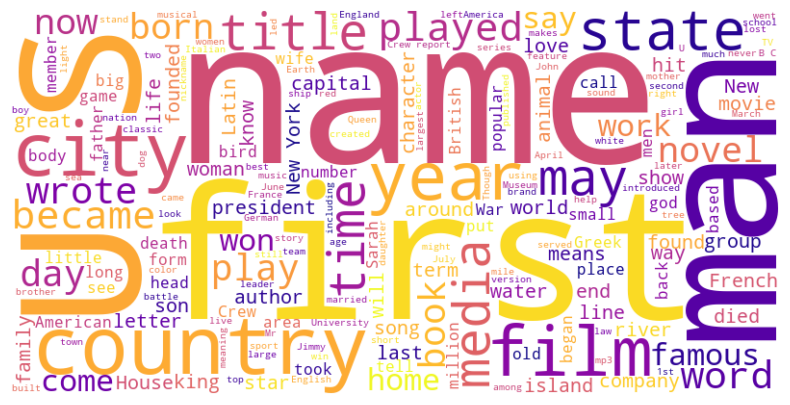

In [ ]:
# Question word cloud
text = " ".join(question for question in jeopardy_df['Question'])
stopwords = set(STOPWORDS)
stopwords.update(["the", "this", "is","blank","archive","jpg","j","named","one", "a", "an", "any", "her", "his", "each", "every",
"its", "it's", "my", "no", "our", "some", "that", "as", "about","but", "by", "for", "from", "in", "like", "of", "on", "onto", "since", "to", "up", "with", "appears", "seen", "based on",
"refers to", "how", "when", "why", "where", "was", "were", "their", "found in", "those",  "includes", "specifc", "known", "called", "sometimes", "usually", "'s", "&","have", "href", "clue crew", "including"
"now", "use", "set", "person", "people", "got", "said", "include", "well", "take", "href", "thing", "many", "find", "blank", "target", "used", "mean", "type", "part", "made", "make", 
"gave", "give", "become", "good", "clue", "often", "run", "go", "take", "_blank", "i"])

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, max_words=200, colormap="plasma").generate(text)
wordcloud.to_file('wordcloud_question.png')


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

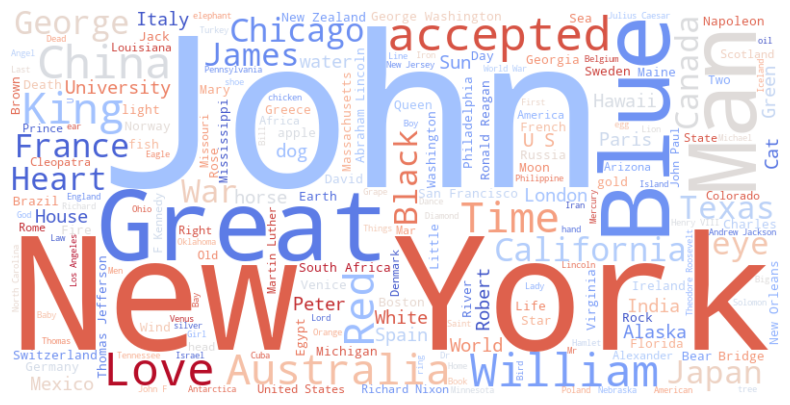

In [ ]:
# Answer word cloud
text = " ".join(answer for answer in jeopardy_df['Answer'])
stopwords = set(STOPWORDS)
stopwords.update(["the", "this", "is","blank","archive","jpg","j","named","one", "a", "an", "any", "her", "his", "each", "every",
"its", "it's", "my", "no", "our", "some", "that", "as", "about","but", "by", "for", "from", "in", "like", "of", "on", "onto", "since", "to", "up", "with", "appears", "seen", "based on",
"refers to", "how", "when", "why", "where", "was", "were", "their", "found in", "those",  "includes", "specifc", "known", "called", "sometimes", "usually", "'s", "&","have", "href", "clue crew", "including"
"now", "use", "set", "person", "people", "got", "said", "include", "well", "take", "href", "thing", "many", "find", "blank", "target", "used", "mean", "type", "part", "made", "make", 
"gave", "give", "become", "good", "clue", "often", "run", "go", "take", "_blank", "i"])

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, max_words=200, colormap="coolwarm").generate(text)

wordcloud.to_file('wordcloud_answer2.png')


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

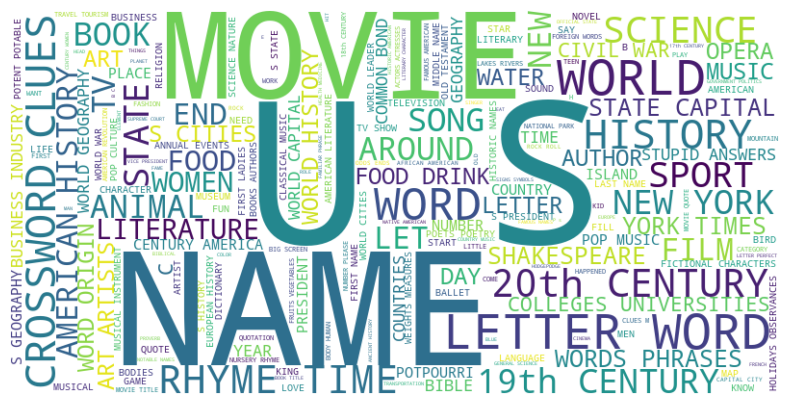

In [17]:
# Category Word Cloud
text = " ".join(category for category in jeopardy_df['Category'])
stopwords = set(STOPWORDS)
stopwords.update(["the", "this", "is","blank","archive","jpg","j","named","one", "a", "an", "any", "her", "his", "each", "every",
"its", "it's", "my", "no", "our", "some", "that", "as", "about","but", "by", "for", "from", "in", "like", "of", "on", "onto", "since", "to", "up", "with", "appears", "seen", "based on",
"refers to", "how", "when", "why", "where", "was", "were", "their", "found in", "those",  "includes", "specifc", "known", "called", "sometimes", "usually", "'s", "&","have", "href", "clue crew", "including"
"now", "use", "set", "person", "people", "got", "said", "include", "well", "take", "href", "thing", "many", "find", "blank", "target", "used", "mean", "type", "part", "made", "make", 
"gave", "give", "become", "good", "clue", "often", "run", "go", "take", "_blank", "i"])

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, max_words=200).generate(text)

wordcloud.to_file('wordcloud_category.png')

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# words in questions of Science category only
science_questions = jeopardy_df[jeopardy_df['Category']=='SCIENCE']['clean_question']
print(science_questions)

268       sea level 70 degrees travels 1,129 feet per se...
274       largest tree, General Sherman California, type...
280       (<a href="http://www.j-archive.com/media/2006-...
286            6 elements inert gases now aristocratic name
292       (<a href="http://www.j-archive.com/media/2006-...
                                ...                        
216571    element whose atomic weight closest atomic number
216577    Inventors Georges Leclanche, Gaston Plante Ale...
216583           Life subject 1965 book "World Without Sun"
216589    1,400 orbits fell back Earth January 4, 1958 b...
216595                    1977 U.S. banned freon propellant
Name: clean_question, Length: 519, dtype: object


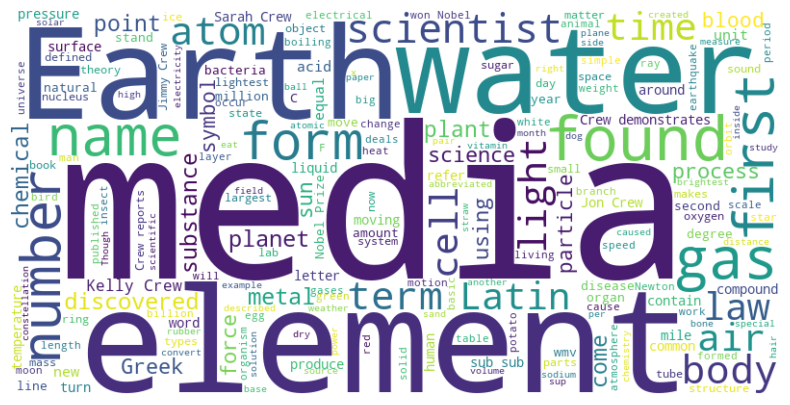

In [ ]:
# word cloud of science only questions
text = " ".join(science_questions)

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# before and after category answer word cloud
before_after_answers = jeopardy_df[jeopardy_df['Category']=='BEFORE & AFTER']['Answer']
print(before_after_answers)

3557             Freaky Friday the 13th
3563                 Erik the Red Giant
3569               Nancy Drew Barrymore
3575                Cape Horn o' Plenty
3581           the Richard Donner Party
                      ...              
211179            Doris Day Care Center
211188    The Funeral Home On The Range
211194           Shirley Chisholm Trail
214730      the Joan of Arc de Triomphe
214736    the Grateful Dead Sea Scrolls
Name: Answer, Length: 547, dtype: object


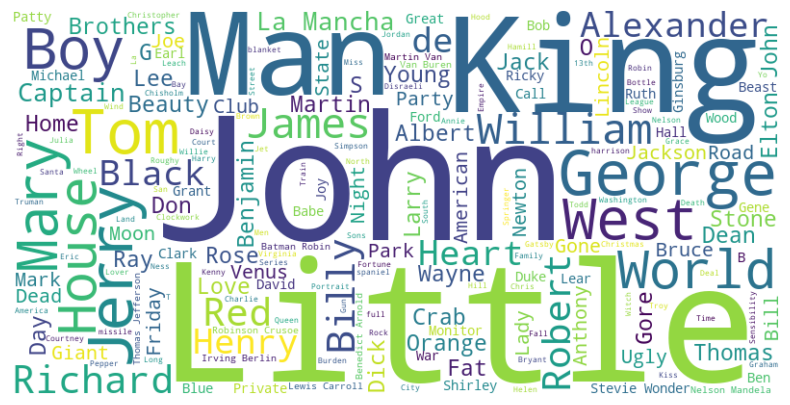

In [ ]:
# word cloud of Before & After answers
text = " ".join(before_after_answers)

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, max_words=200, colormap="viridis").generate(text)

wordcloud.to_file('wordcloud_beforeafteranswers.png')

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

I want to create cleaned columns of Question and Answer to remove the stop words and possibly punctuation.


In [ ]:
# # Add punctuation to stopwords. Will only remove if not next to a string.
stopwords.update(["?", "!", ".", ",", "&", "'"])

# Found another source that showed me how to use lambda function to remove stop words, apply it to each row, and have the string joined back together
jeopardy_df['clean_question'] = jeopardy_df['Question'].apply(lambda text: ' '.join(word for word in text.split() if word.lower() not in stopwords))
print(jeopardy_df['clean_question'])

0         last 8 years life, Galileo house arrest espous...
1         No. 2: 1912 Olympian; football star Carlisle I...
2         city Yuma state record average 4,055 hours sun...
3         1963, live "The Art Linkletter Show", company ...
4         Signer Dec. Indep., framer Constitution Mass.,...
                                ...                        
216925    Puccini opera turns solution 3 riddles posed h...
216926    North America term properly applied 4 species ...
216927    Penny Lane, "Hellraiser" grew up, barber shave...
216928    Ft. Sill, Okla. plea, Arizona land, home, fath...
216929    silent movie title last name 18th c. statesman...
Name: clean_question, Length: 216930, dtype: object


In [ ]:
# Same as above with Answer column
jeopardy_df['clean_answer'] = jeopardy_df['Answer'].apply(lambda text: ' '.join(word for word in text.split() if word.lower() not in stopwords))
print(jeopardy_df['clean_answer'])

0                             Copernicus
1                             Jim Thorpe
2                                Arizona
3                             McDonald's
4                             John Adams
                       ...              
216925                          Turandot
216926                          titmouse
216927                      Clive Barker
216928                          Geronimo
216929    Grigori Alexandrovich Potemkin
Name: clean_answer, Length: 216930, dtype: object


In [13]:
# Final Jeopardy! Round categories word cloud
final_jeopardy_categories = jeopardy_df[jeopardy_df['Round']=='Final Jeopardy!']['Category']
print(final_jeopardy_categories)

55                        THE SOLAR SYSTEM
116                         HISTORIC WOMEN
174                         SPORTS LEGENDS
235                      THE MAP OF EUROPE
296                           FAMOUS SHIPS
                        ...               
216686    MAJOR LEAGUE BASEBALL TEAM NAMES
216746                         SKYSCRAPERS
216807                   NATIONAL CAPITALS
216868                 BESTSELLING AUTHORS
216929                      HISTORIC NAMES
Name: Category, Length: 3631, dtype: object


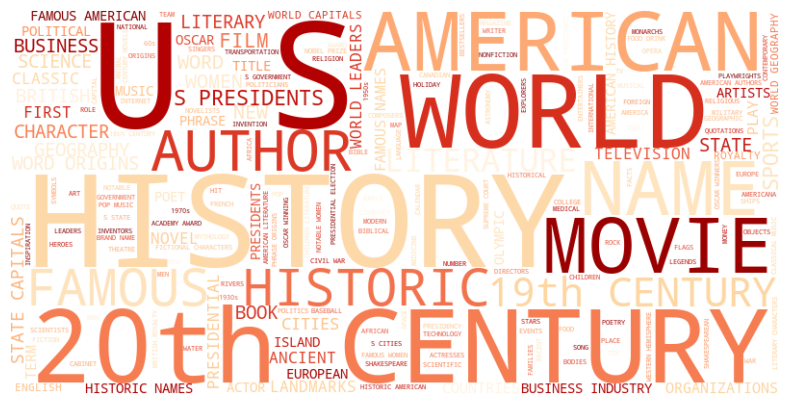

In [21]:
# Word cloud for Final Jeopardy! Round Categories
text = " ".join(final_jeopardy_categories)

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, max_words=200, colormap="OrRd").generate(text)

wordcloud.to_file('wordcloud_fjcategories.png')

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [12]:
# Remove Whitespace in column headers
jeopardy_df.columns = jeopardy_df.columns.str.strip()
jeopardy_df.columns
jeopardy_df.info()

# Remove $ and commas in Value columns
jeopardy_df['Value'] = jeopardy_df['Value'].str.replace('$', '')
jeopardy_df['Value'] = jeopardy_df['Value'].str.replace(',', '')
jeopardy_df['Value']
# Convert Value column to numeric data/integers
jeopardy_df['Value'] = pd.to_numeric(jeopardy_df['Value'], errors='coerce')
jeopardy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1   Air Date     216930 non-null  object
 2   Round        216930 non-null  object
 3   Category     216930 non-null  object
 4   Value        213296 non-null  object
 5   Question     216930 non-null  object
 6   Answer       216927 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Show Number  216930 non-null  int64  
 1   Air Date     216930 non-null  object 
 2   Round        216930 non-null  object 
 3   Category     216930 non-null  object 
 4   Value        213296 non-null  float64
 5   Question     216930 non-null  object 
 6   An

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
- I was able to find all four dirty data types. 
- Missing: I determined the nulls in the Answer column actually were answers 'Null' from looking at the question. I filled those to say 'Null'. The other missing data was in the Value column and corresponded to Final Jeopardy! and Tiebreaker rounds. These rounds will be very informative for future contestants and therefore, not removed or filled because filling to 0 would skew the data.
- Irregular: I attempted to find outliers with the methods we have learned mathmatically, but that does not provide any meaningful insights. I was able to determine that there were varied Value amounts that are not fixed and determined at what point the Values changed during the history of Jeopardy.
- Unnecessary: I've found symbols in the Question column which allowed me to see that there are j-archive links included in the answers. This is helpful for recognizing the amount of media containing questions, but it could also impede further analysis. I may create an additional column that removes those links.
- Inconsistent: There were some formatting issues that I corrected, such as, removing white spaces in Column names and removing the $ and comma from Value column. (I accidently ran the block of code again in this section which is why an error is occuring as the data type has now changed to float64).

2. Did the process of cleaning your data give you new insights into your dataset?
- Yes! My insights are well documented throughout the code above. 

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
- I think some of this dataset will need quite a bit of conditional filter to make any robust conclusions. I may create an additional column that corresponds to round data, but code them so I can run arithematic functions. For example, Jeopardy!, Double Jeopardy!, Final Jeopardy!, and Tiebreaker correspond to 1, 2, 3, and 4, respectively. I don't think it will be wise to replace which is why I'd create an additional column. I'd like to determine overarching categories for the Questions and then drill farther into each category. For example, an overarching category could be Sports, then drilling down, those could separate into Baseball, Basketball, Football, etc., then separate into questions about Players, Tournaments, Rules of Sport, etc. It will also be interesting to see if there are any trends with the number of clues in each Round that were able to be answered. Frequently, there are clues left on the board as time has run out. I could also create a new column to indicate whether a Question was a Daily Double. 


In [ ]:
# jeopardy_df.to_csv('Jeopardy_Cleaned.csv')
#jeopardy_df.to_csv('Jeopardy_Cleaned2.csv')
# 3rd download after removing stop words from question and answer columns (created new columns to hold those)
jeopardy_df.to_csv('Jeopardy_Cleaned3.csv')